We'll implement two classification algorithms which are using all the previous material: probabilities, gradient descent, etc.: 

Logistic regression                                                                                                     
https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F                                                                                  
https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html                                                     
Support Vector Machines

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y1 = np.array([np.random.rand(1) + 2 for c in (range(np.random.choice([c+60 for c in range(40)])))])
y2 = np.array([np.random.rand(1) + 2.4 for c in (range(np.random.choice([c+60 for c in range(40)])))])

x1 = np.array(range(len(y1)))
x2 = np.array([c+50 for c in range(len(y2))])

In [3]:
# data matrix 
a1 = np.concatenate((x1.reshape(-1,1),y1,np.array([1 for c in range(len(x1))]).reshape(-1,1)), 1)
a2 = np.concatenate((x2.reshape(-1,1),y2,np.array([0 for c in range(len(x2))]).reshape(-1,1)), 1)

A = np.concatenate((a1,a2), 0).round(1)
np.random.shuffle(A)

In [4]:
A.shape, y1.shape[0], y2.shape[0]

((168, 3), 78, 90)

In [5]:
A

array([[ 58. ,   2.8,   1. ],
       [ 48. ,   2.2,   1. ],
       [ 79. ,   2.5,   0. ],
       [ 36. ,   2.8,   1. ],
       [ 70. ,   2.8,   1. ],
       [ 87. ,   3.4,   0. ],
       [122. ,   3.4,   0. ],
       [ 52. ,   2.4,   1. ],
       [ 35. ,   2.7,   1. ],
       [ 80. ,   2.6,   0. ],
       [109. ,   2.7,   0. ],
       [119. ,   3.2,   0. ],
       [ 55. ,   3.3,   0. ],
       [ 72. ,   2.8,   0. ],
       [ 82. ,   3.4,   0. ],
       [ 43. ,   2.1,   1. ],
       [ 22. ,   2.9,   1. ],
       [ 66. ,   3.1,   0. ],
       [ 52. ,   2.6,   0. ],
       [ 34. ,   3. ,   1. ],
       [ 61. ,   2.9,   0. ],
       [ 20. ,   2.3,   1. ],
       [102. ,   3.4,   0. ],
       [112. ,   3. ,   0. ],
       [136. ,   2.7,   0. ],
       [139. ,   2.6,   0. ],
       [ 56. ,   2. ,   1. ],
       [ 17. ,   2.2,   1. ],
       [ 77. ,   2.6,   0. ],
       [ 21. ,   2.8,   1. ],
       [101. ,   2.7,   0. ],
       [ 11. ,   2.9,   1. ],
       [ 50. ,   3. ,   0. ],
       [10

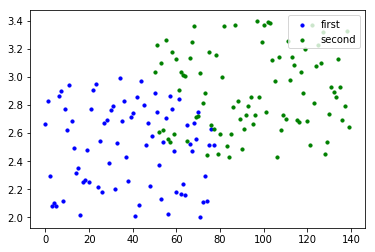

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, s=10, c='b', marker="o", label='first')
ax1.scatter(x2, y2, s=10, c='g', marker="o", label='second')
plt.legend(loc='upper right');
plt.show()

In [7]:
temp = np.ones((A.shape[0], A.shape[1]+1))
temp[:,1:] = A.copy()
X = np.copy(temp[:,:-1])
y = np.copy(temp[:,-1])

In [8]:
X

array([[  1. ,  58. ,   2.8],
       [  1. ,  48. ,   2.2],
       [  1. ,  79. ,   2.5],
       [  1. ,  36. ,   2.8],
       [  1. ,  70. ,   2.8],
       [  1. ,  87. ,   3.4],
       [  1. , 122. ,   3.4],
       [  1. ,  52. ,   2.4],
       [  1. ,  35. ,   2.7],
       [  1. ,  80. ,   2.6],
       [  1. , 109. ,   2.7],
       [  1. , 119. ,   3.2],
       [  1. ,  55. ,   3.3],
       [  1. ,  72. ,   2.8],
       [  1. ,  82. ,   3.4],
       [  1. ,  43. ,   2.1],
       [  1. ,  22. ,   2.9],
       [  1. ,  66. ,   3.1],
       [  1. ,  52. ,   2.6],
       [  1. ,  34. ,   3. ],
       [  1. ,  61. ,   2.9],
       [  1. ,  20. ,   2.3],
       [  1. , 102. ,   3.4],
       [  1. , 112. ,   3. ],
       [  1. , 136. ,   2.7],
       [  1. , 139. ,   2.6],
       [  1. ,  56. ,   2. ],
       [  1. ,  17. ,   2.2],
       [  1. ,  77. ,   2.6],
       [  1. ,  21. ,   2.8],
       [  1. , 101. ,   2.7],
       [  1. ,  11. ,   2.9],
       [  1. ,  50. ,   3. ],
       [  

In [9]:
y

array([1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.])

In [10]:
def sigm(x):
    return 1/(np.exp(-x)+1)

In [11]:
def accuracy_score(y, y_pred):
    return (y == y_pred).astype(int).sum()/y.shape[0]

In [12]:
def train(X_, y_, batch_size, epochs, eta):
    theta = np.random.rand(X.shape[1])
    
    for i in range(epochs):
        print('accuracy: ', accuracy_score(y_, sigm(theta.T@ X_.T).squeeze()>0.5))
        rand_idxs = np.random.randint(X.shape[0], size=batch_size)
        X_Batch = X_[rand_idxs]
        Y_batch = y_[rand_idxs]
        grad = 0
        batch_loss = 0
        for xx, yy in zip(X_Batch, Y_batch):
            grad += xx*(sigm(theta.T@xx)-yy)
            batch_loss += (1-yy)*np.log(1-sigm(theta.T@xx) + 1e-6) + yy*np.log(sigm(theta.T@xx)+ 1e-6)
        print('batch loss: ', -batch_loss)
        theta = theta - (1/X_Batch.shape[0])*eta*grad
    
    return theta
        

In [13]:
theta = train(X, y, 64, 1000, 0.001)

accuracy:  0.4642857142857143
batch loss:  473.5819509014061
accuracy:  0.4642857142857143
batch loss:  336.20349173853975
accuracy:  0.4642857142857143
batch loss:  190.28774268755026
accuracy:  0.4642857142857143
batch loss:  52.75536587661622
accuracy:  0.7916666666666666
batch loss:  18.02382890724687
accuracy:  0.7916666666666666
batch loss:  33.41694630627851
accuracy:  0.7976190476190477
batch loss:  31.047223899404905
accuracy:  0.7916666666666666
batch loss:  28.239783013913353
accuracy:  0.7738095238095238
batch loss:  30.657810969445332
accuracy:  0.8095238095238095
batch loss:  27.472386762527027
accuracy:  0.8035714285714286
batch loss:  24.66900033318934
accuracy:  0.8095238095238095
batch loss:  29.32738485156059
accuracy:  0.7857142857142857
batch loss:  28.986516485627938
accuracy:  0.7976190476190477
batch loss:  28.12326935166973
accuracy:  0.7976190476190477
batch loss:  25.19849944603073
accuracy:  0.8095238095238095
batch loss:  23.804267563723915
accuracy:  0.785

batch loss:  23.456929192491984
accuracy:  0.8095238095238095
batch loss:  22.186914916392446
accuracy:  0.7916666666666666
batch loss:  27.94143848049335
accuracy:  0.8035714285714286
batch loss:  26.531591794721162
accuracy:  0.8035714285714286
batch loss:  25.59357617195502
accuracy:  0.8035714285714286
batch loss:  25.31265133817534
accuracy:  0.8095238095238095
batch loss:  24.706870791861434
accuracy:  0.7976190476190477
batch loss:  26.226525128575062
accuracy:  0.8035714285714286
batch loss:  28.28814043215861
accuracy:  0.7976190476190477
batch loss:  20.408982241694147
accuracy:  0.8035714285714286
batch loss:  26.543494124405132
accuracy:  0.7976190476190477
batch loss:  24.856828507250405
accuracy:  0.8035714285714286
batch loss:  24.294734869883243
accuracy:  0.8035714285714286
batch loss:  27.280501667471913
accuracy:  0.7976190476190477
batch loss:  23.23428826027407
accuracy:  0.7857142857142857
batch loss:  30.70975754117677
accuracy:  0.8035714285714286
batch loss:  2

accuracy:  0.7976190476190477
batch loss:  24.56241503975495
accuracy:  0.7857142857142857
batch loss:  24.237496059435873
accuracy:  0.8095238095238095
batch loss:  23.375558982937346
accuracy:  0.8095238095238095
batch loss:  22.95930690510571
accuracy:  0.7857142857142857
batch loss:  25.185377373670217
accuracy:  0.7857142857142857
batch loss:  26.84142869675408
accuracy:  0.7976190476190477
batch loss:  26.180192321614854
accuracy:  0.7976190476190477
batch loss:  26.37971230968522
accuracy:  0.7916666666666666
batch loss:  25.114657917233377
accuracy:  0.8035714285714286
batch loss:  25.794309360192763
accuracy:  0.8095238095238095
batch loss:  25.537043637917424
accuracy:  0.8095238095238095
batch loss:  34.07993112653851
accuracy:  0.7797619047619048
batch loss:  26.29741336527755
accuracy:  0.8035714285714286
batch loss:  29.826640930331337
accuracy:  0.8095238095238095
batch loss:  28.939591186000367
accuracy:  0.8095238095238095
batch loss:  29.820042974580208
accuracy:  0.7

batch loss:  29.099738361944762
accuracy:  0.8095238095238095
batch loss:  28.138643602757405
accuracy:  0.8035714285714286
batch loss:  25.243926118233283
accuracy:  0.7857142857142857
batch loss:  23.095164388578464
accuracy:  0.7916666666666666
batch loss:  32.07015555608267
accuracy:  0.8095238095238095
batch loss:  28.56634008210668
accuracy:  0.7976190476190477
batch loss:  27.770252806774497
accuracy:  0.7916666666666666
batch loss:  23.351484716631024
accuracy:  0.8095238095238095
batch loss:  30.40453958030008
accuracy:  0.7797619047619048
batch loss:  31.055248965881297
accuracy:  0.7976190476190477
batch loss:  29.024956729080074
accuracy:  0.8035714285714286
batch loss:  26.849987707206203
accuracy:  0.7976190476190477
batch loss:  26.70911010243503
accuracy:  0.7738095238095238
batch loss:  28.618151277358987
accuracy:  0.7857142857142857
batch loss:  26.970054979545303
accuracy:  0.8035714285714286
batch loss:  28.639820018447185
accuracy:  0.8095238095238095
batch loss: 

accuracy:  0.7857142857142857
batch loss:  22.812461687101383
accuracy:  0.7976190476190477
batch loss:  33.51627420862182
accuracy:  0.7738095238095238
batch loss:  28.17272627287696
accuracy:  0.7976190476190477
batch loss:  28.739587899692953
accuracy:  0.7797619047619048
batch loss:  24.92891111905715
accuracy:  0.7797619047619048
batch loss:  27.256458541723728
accuracy:  0.7976190476190477
batch loss:  24.564861991489533
accuracy:  0.7916666666666666
batch loss:  26.45026897228951
accuracy:  0.8035714285714286
batch loss:  22.49870723181806
accuracy:  0.7976190476190477
batch loss:  30.870753830279906
accuracy:  0.8035714285714286
batch loss:  27.998055939393097
accuracy:  0.8095238095238095
batch loss:  26.26284822029902
accuracy:  0.8095238095238095
batch loss:  27.402999048812624
accuracy:  0.8035714285714286
batch loss:  22.05463840313165
accuracy:  0.8095238095238095
batch loss:  22.935855124405673
accuracy:  0.7976190476190477
batch loss:  24.66967890411393
accuracy:  0.785

batch loss:  24.469606829842622
accuracy:  0.8035714285714286
batch loss:  23.99980169016631
accuracy:  0.7976190476190477
batch loss:  26.94654421061255
accuracy:  0.8035714285714286
batch loss:  21.2787458874654
accuracy:  0.8035714285714286
batch loss:  27.03780344526895
accuracy:  0.7797619047619048
batch loss:  28.03059546228348
accuracy:  0.7976190476190477
batch loss:  24.80197495222146
accuracy:  0.8095238095238095
batch loss:  25.65260188442763
accuracy:  0.7857142857142857
batch loss:  27.778638098654202
accuracy:  0.8035714285714286
batch loss:  20.936652941975616
accuracy:  0.7976190476190477
batch loss:  26.872242072946257
accuracy:  0.7976190476190477
batch loss:  27.795250793293775
accuracy:  0.7976190476190477
batch loss:  25.25906628801427
accuracy:  0.8035714285714286
batch loss:  26.886343247818576
accuracy:  0.7857142857142857
batch loss:  25.696391805379225
accuracy:  0.8035714285714286
batch loss:  25.270129697062707
accuracy:  0.8035714285714286
batch loss:  25.6

In [14]:
# test dataset

y1_test = np.array([np.random.rand(1) + 2 for c in (range(np.random.choice([c+60 for c in range(40)])))])
y2_test = np.array([np.random.rand(1) + 2.4 for c in (range(np.random.choice([c+60 for c in range(40)])))])

x1_test = np.array(range(len(y1_test)))
x2_test = np.array([c+50 for c in range(len(y2_test))])

a1_test = np.concatenate((x1_test.reshape(-1,1),y1_test,np.array([1 for c in range(len(x1_test))]).reshape(-1,1)), 1)
a2_test = np.concatenate((x2_test.reshape(-1,1),y2_test,np.array([0 for c in range(len(x2_test))]).reshape(-1,1)), 1)

A_test = np.concatenate((a1_test,a2_test), 0).round(1)
np.random.shuffle(A_test)

In [15]:
# temp_test = np.ones((A_test.shape[0], A_test.shape[1]+1))
# temp_test[:,1:] = A_test
# X_test = temp_test[:,:-1]
# y_test = temp_test[:,-1]
temp_test = np.ones((A_test.shape[0], A_test.shape[1]+1))
temp_test[:,1:] = A_test.copy()
X_test = np.copy(temp_test[:,:-1])
y_test = np.copy(temp_test[:,-1])

In [16]:
X_test

array([[  1. , 104. ,   2.7],
       [  1. ,  48. ,   2.2],
       [  1. ,  93. ,   3.3],
       [  1. , 118. ,   3. ],
       [  1. ,  38. ,   2.7],
       [  1. ,  98. ,   2. ],
       [  1. ,  79. ,   3.2],
       [  1. ,  30. ,   2.4],
       [  1. ,  87. ,   2.9],
       [  1. , 105. ,   2.6],
       [  1. ,  76. ,   3.1],
       [  1. ,  55. ,   2.1],
       [  1. ,  71. ,   2.5],
       [  1. , 103. ,   2.6],
       [  1. ,  57. ,   2.5],
       [  1. ,  78. ,   3.1],
       [  1. , 136. ,   2.8],
       [  1. ,  28. ,   2. ],
       [  1. , 144. ,   2.5],
       [  1. , 120. ,   3.1],
       [  1. , 117. ,   2.4],
       [  1. ,  62. ,   2.2],
       [  1. ,  60. ,   3.2],
       [  1. ,  67. ,   2.7],
       [  1. ,  71. ,   2.3],
       [  1. ,   9. ,   2.8],
       [  1. ,  46. ,   2.9],
       [  1. , 125. ,   3.3],
       [  1. ,  65. ,   3.3],
       [  1. ,  84. ,   2.5],
       [  1. ,  74. ,   2.9],
       [  1. , 126. ,   3.1],
       [  1. ,  95. ,   2.7],
       [  

In [17]:
y_test

array([0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 1.])

In [18]:
def pred_logistic_regr(theta, data):
    return (sigm(theta.T@ data.T).squeeze()>0.5).astype(int)

In [19]:
y_pred_test = pred_logistic_regr(theta, X_test)

In [20]:
y_pred_test

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [21]:
accuracy_score(y_test,y_pred_test)

0.717948717948718

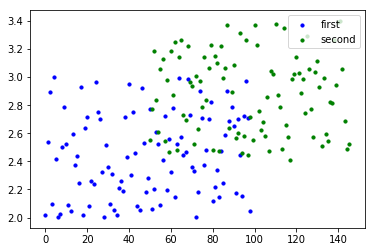

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1_test, y1_test, s=10, c='b', marker="o", label='first')
ax1.scatter(x2_test, y2_test, s=10, c='g', marker="o", label='second')
plt.legend(loc='upper right');
plt.show()

In [23]:
def plot_decision_boundary(trues, falses):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    no_of_preds = len(trues) + len(falses)

    ax.scatter([i for i in range(len(trues))], trues, s=25, c='b', marker="o", label='Trues')
    ax.scatter([i for i in range(len(falses))], falses, s=25, c='r', marker="s", label='Falses')

    plt.legend(loc='upper right');
    ax.set_title("Decision Boundary")
    ax.set_xlabel('N/2')
    ax.set_ylabel('Predicted Probability')
    plt.axhline(.5, color='black')
    plt.show()

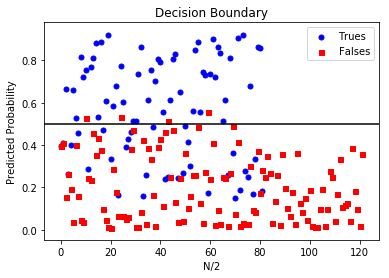

In [24]:
# plot for train  data
trues = sigm(theta.T@ X.T).squeeze()*((y + sigm(theta.T@ X.T).squeeze() >=0.5) > 0)
falses = sigm(theta.T@ X.T).squeeze()*(1-y + (sigm(theta.T@ X.T).squeeze() < 0.5) > 0)
plot_decision_boundary(trues[trues != 0], falses[falses != 0])

In [25]:
# train accuracy
accuracy_score(y, pred_logistic_regr(theta, X))

0.7857142857142857

In [27]:
# test accuracy
accuracy_score(y_test, pred_logistic_regr(theta, X_test))

0.717948717948718

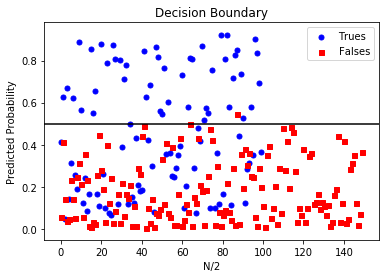

In [28]:
# plot for test  data
trues = sigm(theta.T@ X_test.T).squeeze()*((y_test + sigm(theta.T@ X_test.T).squeeze() >=0.5) > 0)
falses = sigm(theta.T@ X_test.T).squeeze()*(1-y_test + (sigm(theta.T@ X_test.T).squeeze() < 0.5) > 0)
plot_decision_boundary(trues[trues != 0], falses[falses != 0])

In [29]:
from  sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2')

In [30]:
lr.fit(X,y)

C:\Users\davidt\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
y_test_lr = lr.predict(X_test)
y_test_lr

array([0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 1.])

In [32]:
y_pred_test

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [33]:
accuracy_score(y_test_lr, y_test)

0.7538461538461538

In [34]:
accuracy_score(y_pred_test, y_test)

0.717948717948718